In [1]:
#Importa as bibliotecas
import edhec_risk_kit as erk
import yfinance as yf
import math
import matplotlib.pyplot as plt
import numpy as np
from time import time
import pandas as pd
from datetime import date
plt.style.use('dark_background')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [94]:
#Importa os dados do Yahoo Finance
data = yf.download("ITSA4.SA PETR4.SA BRML3.SA PSSA3.SA", start="2018-01-01", interval = "1d")
display(data)

[*********************100%***********************]  4 of 4 completed


Adj Close                                     Close             \
             BRML3.SA   ITSA4.SA   PETR4.SA   PSSA3.SA BRML3.SA   ITSA4.SA   
Date                                                                         
2018-01-02  11.446580   8.304893  14.856965  29.075911    12.40  10.027272   
2018-01-03  11.409657   8.402773  14.991621  29.603111    12.36  10.145454   
2018-01-04  11.548123   8.560890  15.018551  29.627069    12.51  10.336363   
2018-01-05  11.585049   8.575950  15.108323  30.202202    12.55  10.354545   
2018-01-08  11.538891   8.568419  15.287862  30.050434    12.50  10.345454   
...               ...        ...        ...        ...      ...        ...   
2021-04-12   9.810000  10.210000  23.117430  47.450001     9.81  10.210000   
2021-04-13   9.860000  10.190000  23.194843  46.910000     9.86  10.190000   
2021-04-14   9.710000  10.260000  23.562555  46.410000     9.71  10.260000   
2021-04-15   9.740000  10.260000        NaN  46.279999     9.74  10.260000   
2021-04-15   9.740000  10.260000  23.520000  46.279999     9.74  10.260000   

                                     High             ...        Low  \
             PETR4.SA   PSSA3.SA BRML3.SA   ITSA4.SA  ...   PETR4.SA   
Date                                                  ...              
2018-01-02  16.549999  36.400002    12.78  10.027272  ...  16.190001   
2018-01-03  16.700001  37.060001    12.47  10.181818  ...  16.370001   
2018-01-04  16.730000  37.090000    12.64  10.363636  ...  16.620001   
2018-01-05  16.830000  37.810001    12.66  10.354545  ...  16.570000   
2018-01-08  17.030001  37.619999    12.60  10.345454  ...  16.709999   
...               ...        ...      ...        ...  ...        ...   
2021-04-12  23.889999  47.450001    10.00  10.210000  ...  23.780001   
2021-04-13  23.969999  46.910000     9.91  10.240000  ...  23.690001   
2021-04-14  24.350000  46.410000     9.99  10.380000  ...  23.980000   
2021-04-15        NaN  46.279999     9.84  10.360000  ...        NaN   
2021-04-15  23.520000  46.279999     9.84  10.360000  ...  23.450001   

                          Open                                     Volume  \
             PSSA3.SA BRML3.SA   ITSA4.SA   PETR4.SA   PSSA3.SA  BRML3.SA   
Date                                                                        
2018-01-02  36.169998    12.65   9.881818  16.190001  36.330002   7511700   
2018-01-03  36.500000    12.38   9.981818  16.490000  36.650002   4013900   
2018-01-04  36.840000    12.41  10.172727  16.780001  37.310001   7953200   
2018-01-05  37.020000    12.59  10.336363  16.700001  37.349998   3221100   
2018-01-08  37.419998    12.55  10.300000  16.740000  37.910000   3047500   
...               ...      ...        ...        ...        ...       ...   
2021-04-12  47.009998     9.99  10.080000  23.959999  48.000000  21567000   
2021-04-13  46.070000     9.81  10.140000  23.980000  47.169998  18346300   
2021-04-14  46.169998     9.86  10.220000  24.200001  46.950001  15553200   
2021-04-15  46.180000     9.75  10.270000        NaN  46.480000   3523800   
2021-04-15  46.180000     9.75  10.270000  23.700001  46.480000   3523800   

                                           
            ITSA4.SA    PETR4.SA PSSA3.SA  
Date                                       
2018-01-02  14040950  33461800.0   218000  
2018-01-03  13498870  55940900.0   234000  
2018-01-04  14303520  37064900.0   274000  
2018-01-05  10845010  26958200.0   384100  
2018-01-08  11024750  28400000.0   290600  
...              ...         ...      ...  
2021-04-12  20308800  50592900.0   894600  
2021-04-13  31597900  53612300.0  1342000  
2021-04-14  33790900  90836500.0  1204100  
2021-04-15   5586200         NaN   127300  
2021-04-15   5586200  25721900.0   127300  

[809 rows x 24 columns]

In [95]:
#Calcula os retornos das série
x = erk.calcula_retornos(data)
x

,BRML3.SA,ITSA4.SA,PETR4.SA,PSSA3.SA
Date,,,,
2018-01-03,-0.003226,0.011786,0.009064,0.018132
2018-01-04,0.012136,0.018817,0.001796,0.000809
2018-01-05,0.003197,0.001759,0.005977,0.019412
2018-01-08,-0.003984,-0.000878,0.011884,-0.005025
2018-01-09,-0.019200,-0.015817,0.000000,0.006911
...,...,...,...,...
2021-04-12,-0.014070,0.016932,0.010148,-0.003988
2021-04-13,0.005097,-0.001959,0.003349,-0.011380
2021-04-14,-0.015213,0.006870,0.015853,-0.010659


In [96]:
#Calcula os retornos anualizados
xano = erk.annualize_rets(x, 252)
xano

BRML3.SA   -0.072540
ITSA4.SA    0.007182
PETR4.SA    0.115849
PSSA3.SA    0.077771
dtype: float64

In [97]:
#Calcula a matriz de covariância anualizada
cov = x.cov()*252
cov

,BRML3.SA,ITSA4.SA,PETR4.SA,PSSA3.SA
BRML3.SA,0.214589,0.095888,0.129154,0.054750
ITSA4.SA,0.095888,0.121083,0.113272,0.045438
PETR4.SA,0.129154,0.113272,0.285182,0.054576
PSSA3.SA,0.054750,0.045438,0.054576,0.107802


In [98]:
#Calcula a Taxa Livre de Risco
cdi = erk.consulta_bc(12)
cdi_recente = cdi.iloc[-1]
r = (1 + cdi_recente/100).prod()**(252)-1
r

0.02649873258040536

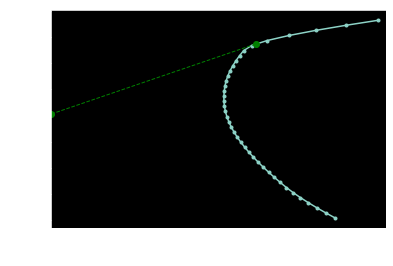

In [105]:
#Plota a fronteira de Markowitz e o Capital Market Line
erk.plot_ef(40, xano, cov, show_cml=True, riskfree_rate = r)

In [104]:
# Pesos para um portfolio com 7% de volatitilidade
df = pd.DataFrame(erk.minimize_vol(0.070, xano, cov).round(2))
df.index = xano.index
df = df.rename(columns={0: "Pesos"})
df

,Pesos
BRML3.SA,0.00
ITSA4.SA,0.19
PETR4.SA,0.14
PSSA3.SA,0.67


In [101]:
# Pesos do Maximum Sharpe Portfolio
msrpesos = pd.DataFrame(erk.msr(r, xano, cov).round(2))
msrpesos.index = xano.index
msrpesos = msrpesos.rename(columns={0: "Pesos"})
msrpesos

,Pesos
BRML3.SA,0.00
ITSA4.SA,0.00
PETR4.SA,0.41
PSSA3.SA,0.59
